In [12]:
import pandas as pd

In [13]:
import numpy as np

In [14]:
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns

In [16]:
df = pd.read_csv("C:/Users/91970/OneDrive/Pictures/Saved Pictures/titanic.csv")

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

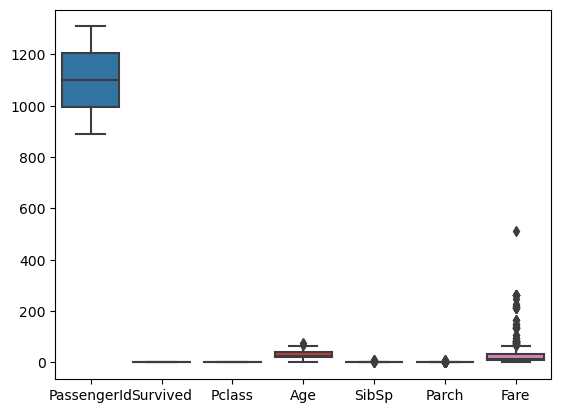

In [19]:
sns.boxplot(data=df)

In [20]:
df[["Age","Cabin","Fare"]].fillna(0)

,Age,Cabin,Fare
0,34.5,0,7.8292
1,47.0,0,7.0000
2,62.0,0,9.6875
3,27.0,0,8.6625
4,22.0,0,12.2875
...,...,...,...
413,0.0,0,8.0500
414,39.0,C105,108.9000
415,38.5,0,7.2500
416,0.0,0,8.0500


In [21]:
df[["Age","Cabin","Fare"]] = df[["Age","Cabin","Fare"]].fillna(0)

In [22]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

C:\Users\91970\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

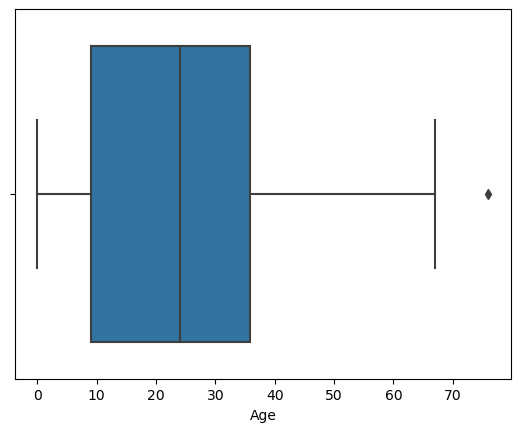

In [23]:
sns.boxplot(df["Age"])

C:\Users\91970\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

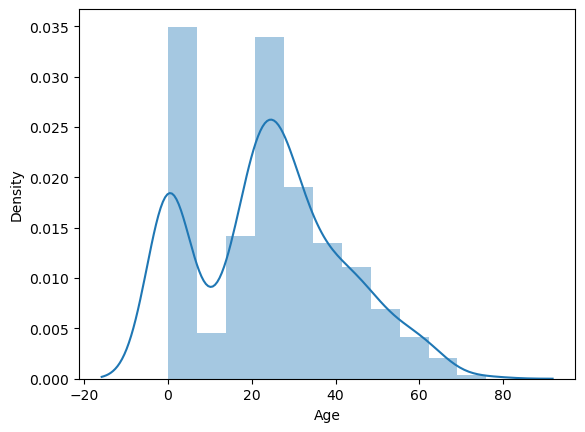

In [24]:
sns.distplot(df["Age"])

In [25]:
df["Age"].skew()

0.24651079649498606

# Applying mean-std

In [26]:
am=df["Age"].mean()

In [27]:
am

24.044258373205743

In [29]:
s=df["Age"].std()

In [30]:
s

17.599608046928363

In [31]:
alow=am-3*s

In [32]:
alow

-28.754565767579344

In [33]:
aup=am+3*s

In [34]:
aup

76.84308251399082

In [35]:
df[df["Age"]<alow]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [36]:
df[df["Age"]>aup]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [37]:
df[(df["Age"]<alow)|(df["Age"]>aup)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


C:\Users\91970\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

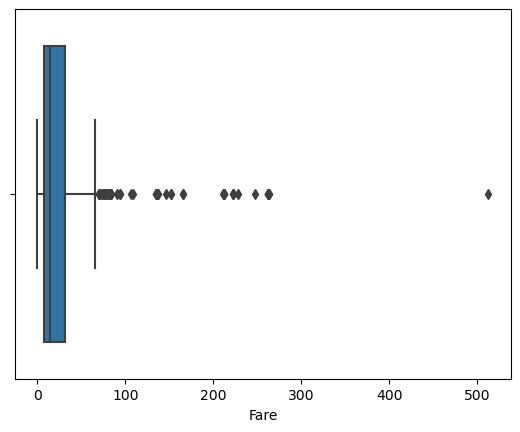

In [38]:
sns.boxplot(df["Fare"])

C:\Users\91970\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

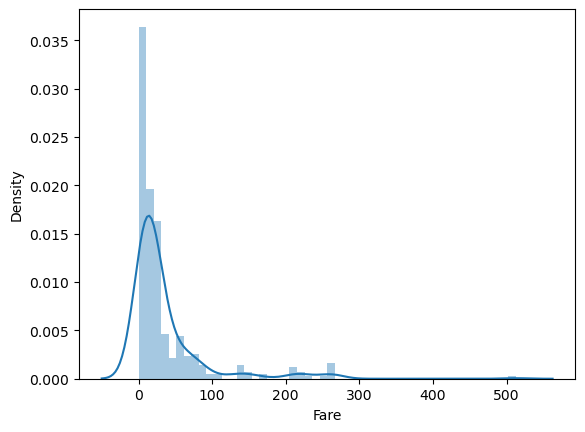

In [39]:
sns.distplot(df["Fare"])

In [40]:
df["Fare"].skew()

3.6901877912957595

# Applying IQR

In [47]:
fq1=df["Fare"].quantile(0.25)

In [48]:
fq1

7.8958

In [49]:
fq3=df["Fare"].quantile(0.75)

In [50]:
fq3

31.471875

In [51]:
iqr=fq3-fq1

In [52]:
iqr

23.576075

In [53]:
flow=fq1-(1.5*iqr)

In [54]:
flow

-27.468312499999996

In [55]:
fup=fq3+(1.5*iqr)

In [56]:
fup

66.8359875

In [57]:
df[df["Fare"]<flow]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [58]:
df[df["Fare"]>fup]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
59,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C
64,956,0,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
74,966,1,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C
75,967,0,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S


In [59]:
df["Fare"] = df["Fare"].map(lambda x :flow if x<flow else fup if x>fup else x)

C:\Users\91970\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

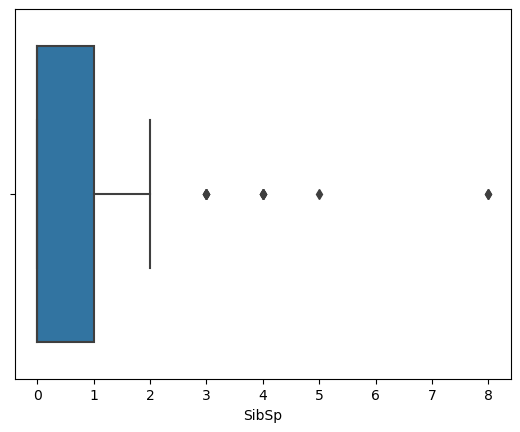

In [60]:
sns.boxplot(df["SibSp"])

C:\Users\91970\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SibSp', ylabel='Density'>

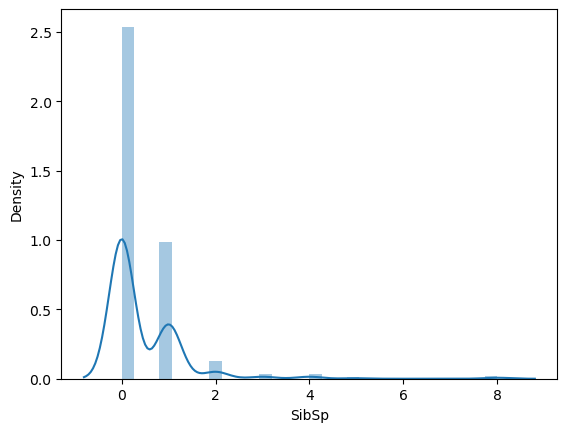

In [61]:
sns.distplot(df["SibSp"])

In [62]:
df["SibSp"].skew()

4.168336568562722

# Applying IQR

In [63]:
sq1=df["SibSp"].quantile(0.25)

In [64]:
sq1

0.0

In [65]:
sq3=df["SibSp"].quantile(0.75)

In [66]:
sq3

1.0

In [67]:
iqr1=sq3-sq1

In [68]:
iqr1

1.0

In [69]:
slow=sq1-(1.5*iqr1)

In [70]:
slow

-1.5

In [71]:
sup=sq3+(1.5*iqr1)

In [72]:
sup

2.5

In [73]:
df[df["SibSp"]<slow]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [74]:
df[df["SibSp"]>sup]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,66.835988,C23 C25 C27,S
55,947,0,3,"Rice, Master. Albert",male,10.0,4,1,382652,29.125000,0,Q
140,1032,1,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.900000,0,S
145,1037,0,3,"Vander Planke, Mr. Julius",male,31.0,3,0,345763,18.000000,0,S
154,1046,0,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.387500,0,S
188,1080,1,3,"Sage, Miss. Ada",female,0.0,8,2,CA. 2343,66.835988,0,S
214,1106,1,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775000,0,S
360,1252,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,66.835988,0,S
379,1271,0,3,"Asplund, Master. Carl Edgar",male,5.0,4,2,347077,31.387500,0,S
389,1281,0,3,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.075000,0,S


In [75]:
df["SibSp"] = df["SibSp"].map(lambda x :slow if x<slow else sup if x>sup else x)

C:\Users\91970\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch'>

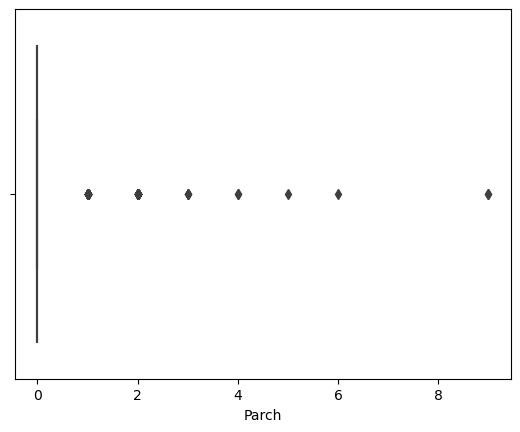

In [76]:
sns.boxplot(df["Parch"])

C:\Users\91970\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Parch', ylabel='Density'>

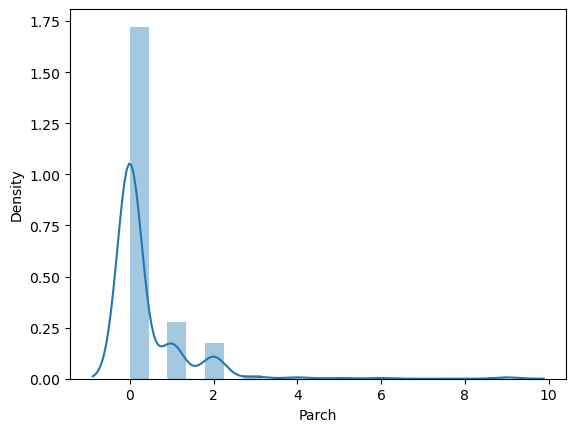

In [77]:
sns.distplot(df["Parch"])

In [78]:
df["Parch"].skew()

4.654461698299236

In [79]:
pq1=df["Parch"].quantile(0.25)

In [80]:
pq1

0.0

In [81]:
pq3=df["Parch"].quantile(0.75)

In [82]:
pq3

0.0

In [83]:
iqr2=pq3-pq1

In [84]:
iqr2

0.0

In [85]:
plow=pq1-(1.5*iqr2)

In [86]:
plow

0.0

In [87]:
pup=pq3+(1.5*iqr2)

In [88]:
pup

0.0

In [89]:
df[df["Parch"]<plow]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [90]:
df[df["Parch"]>pup]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1,3101298,12.287500,0,S
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1.0,1,248738,29.000000,0,S
21,913,0,3,"Olsen, Master. Artur Karl",male,9.0,0.0,1,C 17368,3.170800,0,S
23,915,0,1,"Williams, Mr. Richard Norris II",male,21.0,0.0,1,PC 17597,61.379200,0,C
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1.0,3,PC 17608,66.835988,B57 B59 B63 B66,C
...,...,...,...,...,...,...,...,...,...,...,...,...
397,1289,1,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48.0,1.0,1,13567,66.835988,B41,C
402,1294,1,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0.0,1,112378,59.400000,0,C
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1.0,1,113503,66.835988,C80,C
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1.0,1,SOTON/O.Q. 3101315,13.775000,0,S


In [91]:
df["Parch"] = df["Parch"].map(lambda x :plow if x<plow else pup if x>pup else x)

C:\Users\91970\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PassengerId'>

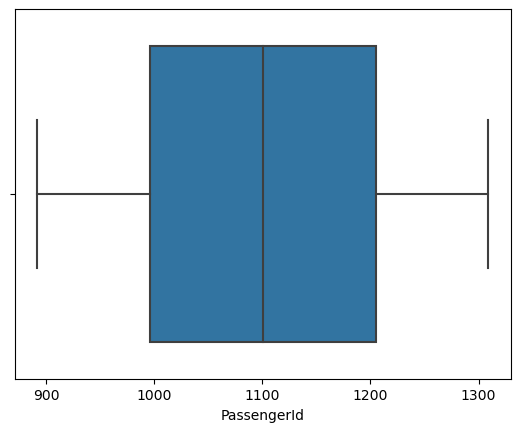

In [92]:
sns.boxplot(df["PassengerId"])

C:\Users\91970\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived'>

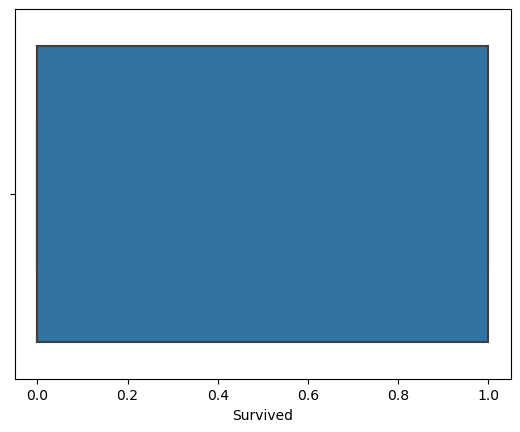

In [93]:
sns.boxplot(df["Survived"])

C:\Users\91970\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass'>

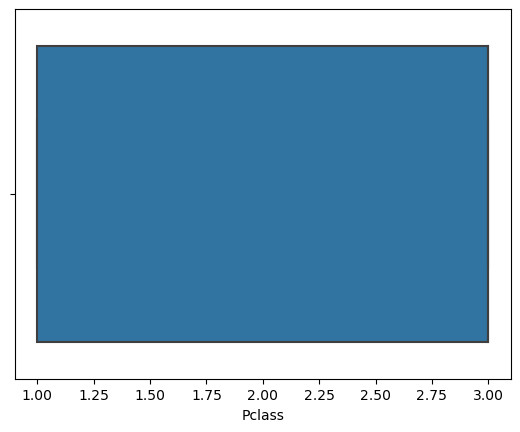

In [94]:
sns.boxplot(df["Pclass"])

In [96]:
pd.get_dummies(df)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Master. Eugene Joseph","Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen",...,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,34.5,0.0,0.0,7.829200,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,893,1,3,47.0,1.0,0.0,7.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,894,0,2,62.0,0.0,0.0,9.687500,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,895,0,3,27.0,0.0,0.0,8.662500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,896,1,3,22.0,1.0,0.0,12.287500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0.0,0.0,0.0,8.050000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
414,1306,1,1,39.0,0.0,0.0,66.835988,0,0,0,...,0,0,0,0,0,0,0,1,0,0
415,1307,0,3,38.5,0.0,0.0,7.250000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
416,1308,0,3,0.0,0.0,0.0,8.050000,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [97]:
df=pd.get_dummies(df,drop_first=True)

In [98]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abrahamsson, Mr. Abraham August Johannes",...,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_Q,Embarked_S
0,892,0,3,34.5,0.0,0.0,7.829200,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,893,1,3,47.0,1.0,0.0,7.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,894,0,2,62.0,0.0,0.0,9.687500,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,895,0,3,27.0,0.0,0.0,8.662500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,896,1,3,22.0,1.0,0.0,12.287500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0.0,0.0,0.0,8.050000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
414,1306,1,1,39.0,0.0,0.0,66.835988,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,1307,0,3,38.5,0.0,0.0,7.250000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
416,1308,0,3,0.0,0.0,0.0,8.050000,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [99]:
X=df.drop("Survived",axis=1)

In [100]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abrahamsson, Mr. Abraham August Johannes","Name_Abrahim, Mrs. Joseph (Sophie Halaut Easu)",...,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_Q,Embarked_S
0,892,3,34.5,0.0,0.0,7.829200,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,893,3,47.0,1.0,0.0,7.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,894,2,62.0,0.0,0.0,9.687500,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,895,3,27.0,0.0,0.0,8.662500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,896,3,22.0,1.0,0.0,12.287500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0.0,0.0,0.0,8.050000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
414,1306,1,39.0,0.0,0.0,66.835988,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,1307,3,38.5,0.0,0.0,7.250000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
416,1308,3,0.0,0.0,0.0,8.050000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [101]:
y=df["Survived"]

In [102]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [105]:
X.shape,X_train.shape,X_test.shape

((418, 864), (334, 864), (84, 864))

In [106]:
y.shape,y_train.shape,y_test.shape

((418,), (334,), (84,))

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rfc=RandomForestClassifier()

In [109]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [110]:
rfc.score(X_test,y_test)

1.0

# Auto ml

In [111]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

In [112]:
from sklearn.svm import SVC

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
abc=AdaBoostClassifier()

In [116]:
gbc=GradientBoostingClassifier()

In [117]:
rfc=RandomForestClassifier()

In [118]:
svm=SVC()

In [119]:
lreg=LogisticRegression()

In [120]:
dtc=DecisionTreeClassifier()

In [121]:
clist=[abc,gbc,rfc,svm,lreg,dtc]

In [122]:
clist

[AdaBoostClassifier(),
 GradientBoostingClassifier(),
 RandomForestClassifier(),
 SVC(),
 LogisticRegression(),
 DecisionTreeClassifier()]

In [123]:
import time

In [124]:
for i in clist:
    print(i,end = "==")
    i.fit(X_train,y_train)
    m=i.score(X_test,y_test)
    print(m)
    time.sleep(0.6)

AdaBoostClassifier()==1.0
GradientBoostingClassifier()==1.0
RandomForestClassifier()==1.0
SVC()==0.6071428571428571
LogisticRegression()==

C:\Users\91970\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0
DecisionTreeClassifier()==1.0


# Kfold cross validation

In [125]:
from sklearn.model_selection import KFold

In [126]:
kfold_validation=KFold()

In [127]:
from sklearn.model_selection import cross_val_score

In [128]:
clist

[AdaBoostClassifier(),
 GradientBoostingClassifier(),
 RandomForestClassifier(),
 SVC(),
 LogisticRegression(),
 DecisionTreeClassifier()]

In [130]:
 for mod in clist:
    print(mod,end="==>")
    score=cross_val_score(mod,X,y,cv=kfold_validation)
    print(score)
    print("Average of scores",np.mean(score))
    print("**************************************************************")

AdaBoostClassifier()==>[1. 1. 1. 1. 1.]
Average of scores 1.0
**************************************************************
GradientBoostingClassifier()==>[1. 1. 1. 1. 1.]
Average of scores 1.0
**************************************************************
RandomForestClassifier()==>[1. 1. 1. 1. 1.]
Average of scores 1.0
**************************************************************
SVC()==>[0.61904762 0.63095238 0.5952381  0.72289157 0.61445783]
Average of scores 0.6365174985656914
**************************************************************
LogisticRegression()==>

C:\Users\91970\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91970\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[1. 1. 1. 1. 1.]
Average of scores 1.0
**************************************************************
DecisionTreeClassifier()==>[1. 1. 1. 1. 1.]
Average of scores 1.0
**************************************************************


C:\Users\91970\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# stratified kfold cross validation

In [131]:
from sklearn.model_selection import StratifiedKFold

In [132]:
skfold_validation=StratifiedKFold(10)

In [133]:
for mod in clist:
    print(mod,end="==>")
    scores=cross_val_score(mod,X,y,cv=skfold_validation)
    print(scores)
    print("Average of scores",np.mean(scores))
    print("**************************************************************")

AdaBoostClassifier()==>[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average of scores 1.0
**************************************************************
GradientBoostingClassifier()==>[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average of scores 1.0
**************************************************************
RandomForestClassifier()==>[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average of scores 1.0
**************************************************************
SVC()==>[0.64285714 0.64285714 0.64285714 0.64285714 0.64285714 0.64285714
 0.61904762 0.61904762 0.63414634 0.63414634]
Average of scores 0.6363530778164923
**************************************************************
LogisticRegression()==>

C:\Users\91970\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91970\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average of scores 1.0
**************************************************************
DecisionTreeClassifier()==>[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average of scores 1.0
**************************************************************
